## Project Introduction

This is an exploratory project using data from several data sets. I used the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This is a Twitter account that allows people to rate images of peoples dogs. I imported the 'image_predictions.tsv' which contains image prodictions for the posted dogs through the provided URL. Lastly, I used another provided file tweet_json.txt. This file contains data like favorite counts and retweet counts. All these data sets were gathered, analylized, cleaned, and stored. Finaly I explored the cleaned data looking for insites and made visualizations to help explain the insites.

## Gathering Data

> First I imported all our packages like Pandas, Numpy, Json, ect. Following that I did not use the Twitter API but rather the Udacity provided file twitter-archive-enhanced.csv and assigned it to the **wrd_df**.<br>

> Then I gathered the tweet image prerdictions data through the Udacity provided URL and assigned it to **img_predictions_df**.<br>

>Lastly I gathered the favorite count and retweet information by using pandas/Json to read in the tweet-json.txt file line by line and assign it to the **retweet_df**.


## Assessing Data

After gathering the data I used some basic functions to expand some of the newly created data frames and begin assessing the data within them.<br>
> **.head()**<br>
> **.value_counts()**<br>
> **.info()**<br>
> **.unique()**

This project required finding and correcting at least 8 quality issues and 2 tidiness issues. I decided to find and correct 10 quality issues and 2 tidiness issues. The issues that I found are documented below.

### Quality issues
**1. Img_prediction_df columns not very descriptive.**<br>
(p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

**2. Lower and uppercase dog names in img_predictions.**

**3. Unneeded columns in wrd_df...**
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- doggo
- floofer
- pupper
- puppo

**4. Incorrect data types.**
- Timestamp should be datetime data type not an object.
- Tweet_id should be object data type not integer.
- Rating_numerator and rating_denominator should be float data type not integer.
- Favorite_count should be integer data type not float.

**5. Removing tweets that are not dogs from img_predictions_df.**

**6. Reducing the string length in 'expanded_urls' column with in the wrd_df.**

**7. Don't neet tweets beyond August 1st, 2017 in wrd_df.**

**8. There are words in the 'name' column of wrd_df that are clearly not dog names**

**9. Both 'rating_numerator' and 'rating_denominator' columns have rows that can be dropped.**

**10. Extracting the ratings from the text column in wrd_df.**


## Cleaning Data

Before I did anything I made sure to make a copy of all three of my data sets so that all my cleaning would be preformed on the copies. Thus,  leaving the original data sets intact in case of emergency. This was the most complex and time consuming step for this project. I decided to start with the tidiness issues first, then moved on to the qualitity issues. There was a magnitude of code written to correct all the issues stated in the 'Assessing Data' step above. For a detailed breakdown of how each issue was cleaned please see **wrangle_act.ipynb**.

## Storing Data

After the copied data sets were cleaned they were saved to two master csv files.<br>
**Note** that the retweet_df was no longer needed as the needed column from that data set was concated to copy_wrd_df in the cleaning step.
> **1) twitter_archive_master_1.csv** (copy_wrd_df)<br>
> **2) twitter_archive_master_2.csv** (copy_img_predictions_df)

## Analyzing and visualizing Data

First I read in my **twitter_archive_master_1** and assigned it to the **clean_wrd** data frame. Then reading in **twitter_archive_master_2** and assigning it to the **clean_img** data frame. The insites below were found by using the following pandas functions and analyzing the results.
> clean_wrd.name.value_counts().head()<br>
> clean_wrd.name.head()<br>
> sorted_name_df = clean_wrd.sort_values('name')<br>
> sorted_name_df.name.head()<br>
> clean_wrd.rating_numerator.value_counts()

#### Insights:
1. From the data collected the most commonly chosen dog name is Charlie.

2. There doesn't appear to be a correlation between what letter a dogs name starts with and the amount of favoites it recieves. (Visualization 1)

3. The majority of ratings that were given were 10/10, 11/10, 12/10, and 13/10. With the most popular rating being 12/10. (Visualization 2)

## Visualizations

I decided to use two seperate visualizations to help me find my insites. My 2nd insite was best visualized using a scatterplot while my 3rd insite was best visualized using a bar chart.

### Insite #2 Visualization

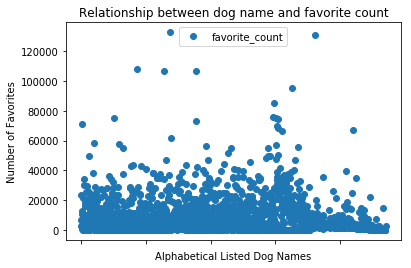

In [4]:
import pandas as pd
clean_wrd = pd.read_csv('twitter_archive_master_1.csv')
sorted_name_df = clean_wrd.sort_values('name')
ax = sorted_name_df.plot(x='name', y='favorite_count', title='Relationship between dog name and favorite count', style='o')
ax.set(xlabel='Alphabetical Listed Dog Names', ylabel='Number of Favorites');

### Insite #3 Visualization

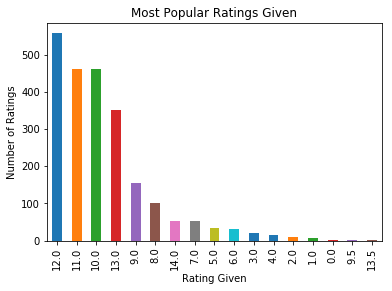

In [5]:
ax = clean_wrd.rating_numerator.value_counts().plot(kind='bar', title='Most Popular Ratings Given')
ax.set(xlabel='Rating Given', ylabel='Number of Ratings');